In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the dataset
df = pd.read_csv('traffic.csv')

# Display the first few rows of the dataset
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [14]:
# Convert the DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Check for missing values
df.isnull().sum()

# If there are missing values, fill them or drop them
df.dropna(inplace=True)

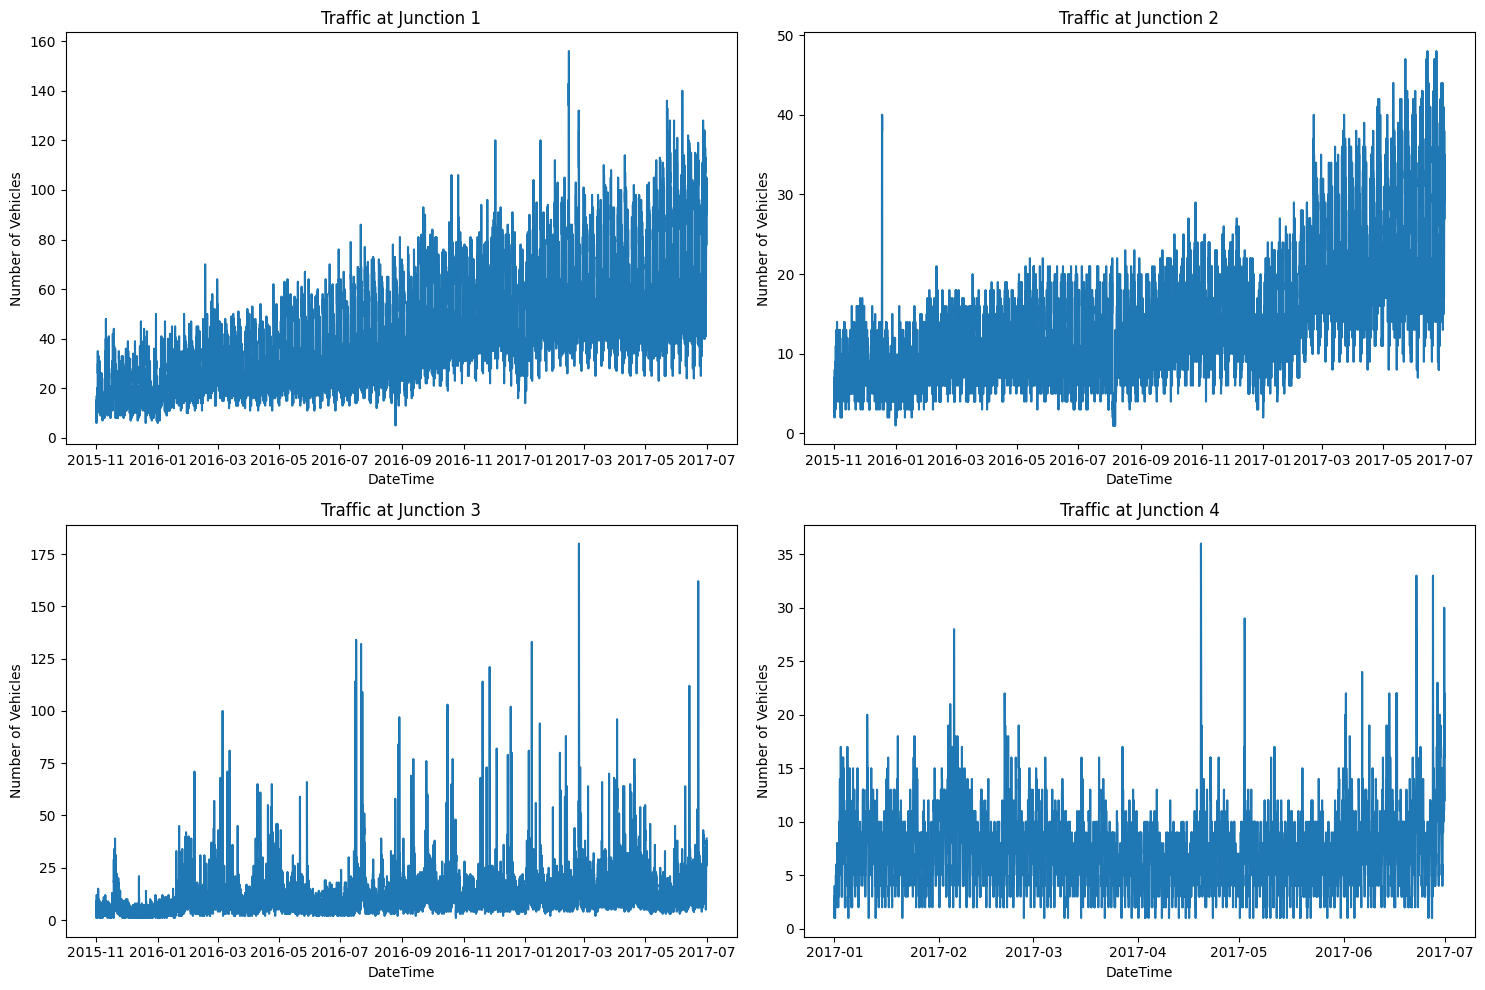

In [15]:
# Plot the traffic data for each junction
junctions = df['Junction'].unique()
plt.figure(figsize=(15, 10))

for i, junction in enumerate(junctions, 1):
    plt.subplot(2, 2, i)
    junction_data = df[df['Junction'] == junction]['Vehicles']
    plt.plot(junction_data)
    plt.title(f'Traffic at Junction {junction}')
    plt.xlabel('DateTime')
    plt.ylabel('Number of Vehicles')

plt.tight_layout()
plt.show()

In [16]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] > 0.05:
        print("The series is not stationary.")
    else:
        print("The series is stationary.")

# Check stationarity for each junction
for junction in junctions:
    print(f'Junction {junction}:')
    junction_data = df[df['Junction'] == junction]['Vehicles']
    check_stationarity(junction_data)
    print()

Junction 1:
ADF Statistic: -7.148077688287184
p-value: 3.193842996353704e-10
Critical Values: {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}
The series is stationary.

Junction 2:
ADF Statistic: -8.041077275597704
p-value: 1.846368366770669e-12
Critical Values: {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}
The series is stationary.

Junction 3:
ADF Statistic: -8.236600353699243
p-value: 5.867295855827385e-13
Critical Values: {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}
The series is stationary.

Junction 4:
ADF Statistic: -6.7267321962656
p-value: 3.374874583447868e-09
Critical Values: {'1%': -3.431867086998538, '5%': -2.862210364905111, '10%': -2.567126840085047}
The series is stationary.



In [17]:
# Define a function to fit the ARIMA model and make predictions
def arima_model(train, test, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

# Split the data into training and testing sets (e.g., last 10% of data for testing)
split_ratio = 0.9

for junction in junctions:
    print(f'Junction {junction}:')
    junction_data = df[df['Junction'] == junction]['Vehicles']
    train_size = int(len(junction_data) * split_ratio)
    train, test = junction_data[:train_size], junction_data[train_size:]

    # Fit the ARIMA model (p, d, q) - these parameters need tuning
    order = (5, 1, 0)  # This is an example, you need to tune these parameters
    forecast = arima_model(train, test, order)

Junction 1:
Junction 2:
Junction 3:
Junction 4:


Junction 1:


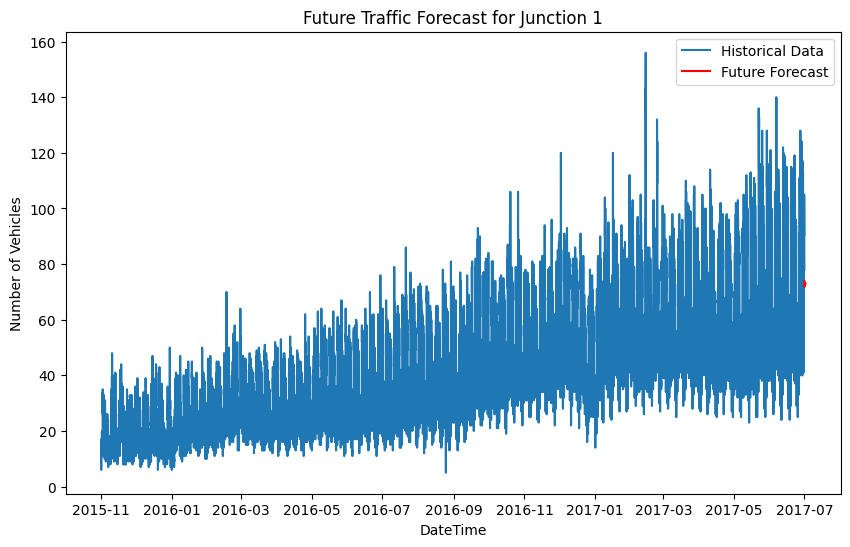

Junction 2:


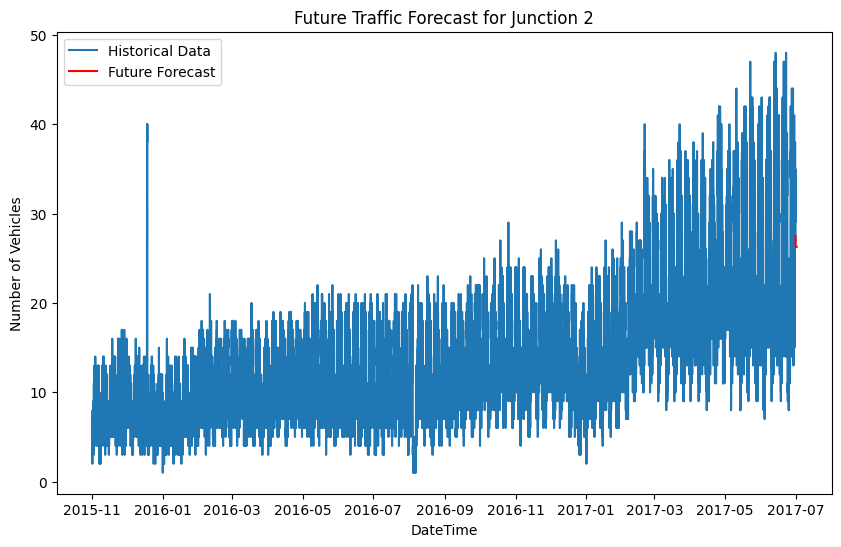

Junction 3:


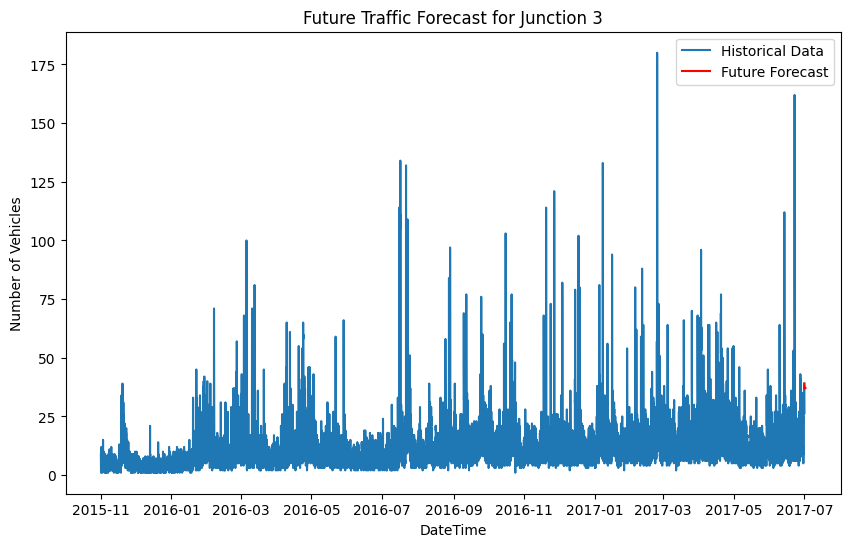

Junction 4:


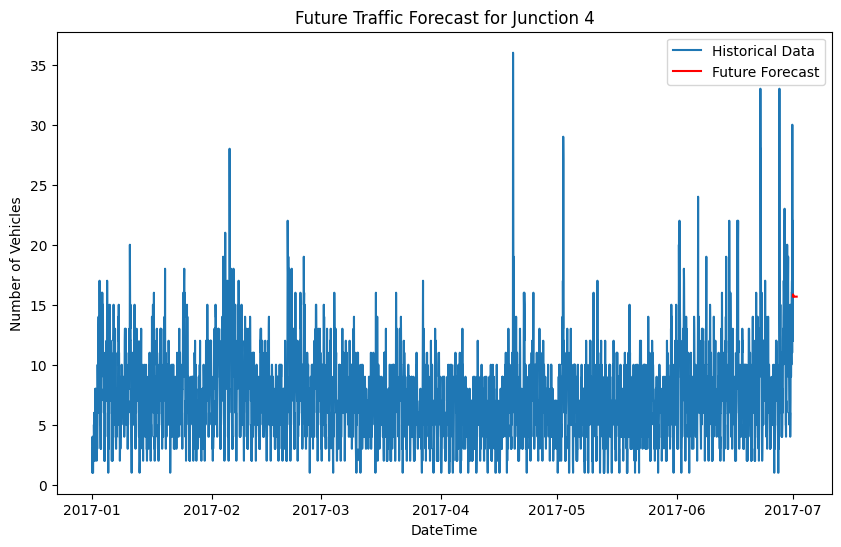

In [18]:
# Future forecasting function
def forecast_future(train, order, steps):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    future_forecast = model_fit.forecast(steps=steps)
    return future_forecast

forecast_steps = 24

# Future forecast for each junction
for junction in junctions:
    print(f'Junction {junction}:')
    junction_data = df[df['Junction'] == junction]['Vehicles']
    order = (5, 1, 0)

    future_forecast = forecast_future(junction_data, order, forecast_steps)

    future_index = pd.date_range(start=junction_data.index[-1], periods=forecast_steps, freq='H')
    future_index = future_index.shift(1, freq='H')

    plt.figure(figsize=(10, 6))
    plt.plot(junction_data, label='Historical Data')
    plt.plot(future_index, future_forecast, label='Future Forecast', color='red')
    plt.title(f'Future Traffic Forecast for Junction {junction}')
    plt.xlabel('DateTime')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.show()

In [19]:
from datetime import datetime

def predict_traffic_for_input(junction, start_date, periods):
    # Filter data for the given junction
    junction_data = df[df['Junction'] == junction]['Vehicles']
    
    # Fit the ARIMA model
    order = (5, 1, 0)  # Tune these parameters as needed
    model = ARIMA(junction_data, order=order)
    model_fit = model.fit()
    
    # Generate date range for the forecast
    start_date = pd.to_datetime(start_date)
    future_index = pd.date_range(start=start_date, periods=periods, freq='H')
    
    # Make predictions
    forecast = model_fit.predict(start=future_index[0], end=future_index[-1])
    
    return forecast

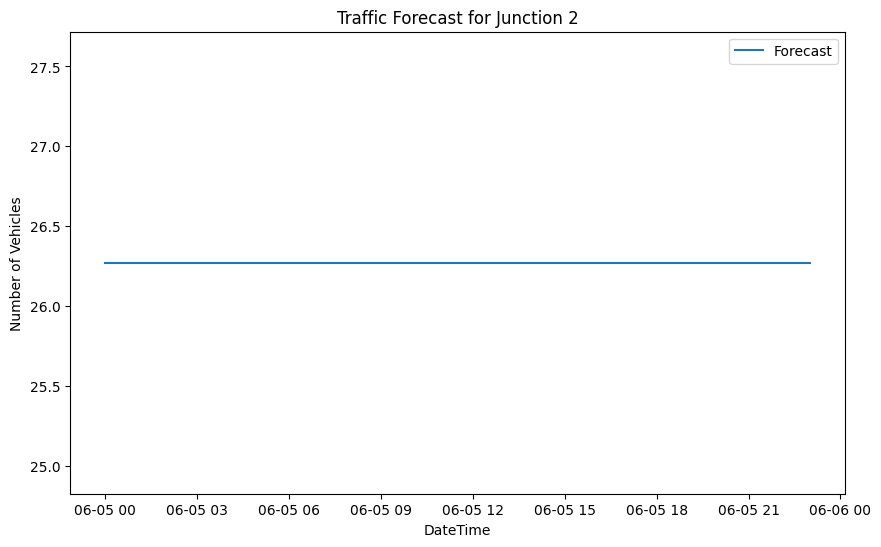

2023-06-05 00:00:00    26.272272
2023-06-05 01:00:00    26.272272
2023-06-05 02:00:00    26.272272
2023-06-05 03:00:00    26.272272
2023-06-05 04:00:00    26.272272
2023-06-05 05:00:00    26.272272
2023-06-05 06:00:00    26.272272
2023-06-05 07:00:00    26.272272
2023-06-05 08:00:00    26.272272
2023-06-05 09:00:00    26.272272
2023-06-05 10:00:00    26.272272
2023-06-05 11:00:00    26.272272
2023-06-05 12:00:00    26.272272
2023-06-05 13:00:00    26.272272
2023-06-05 14:00:00    26.272272
2023-06-05 15:00:00    26.272272
2023-06-05 16:00:00    26.272272
2023-06-05 17:00:00    26.272272
2023-06-05 18:00:00    26.272272
2023-06-05 19:00:00    26.272272
2023-06-05 20:00:00    26.272272
2023-06-05 21:00:00    26.272272
2023-06-05 22:00:00    26.272272
2023-06-05 23:00:00    26.272272
Freq: h, Name: predicted_mean, dtype: float64


In [20]:
# Example usage:
junction = 2
start_date = '2023-06-05'
periods = 24  # Predict for the next 24 hours

forecast = predict_traffic_for_input(junction, start_date, periods)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecast')
plt.title(f'Traffic Forecast for Junction {junction}')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

print(forecast)

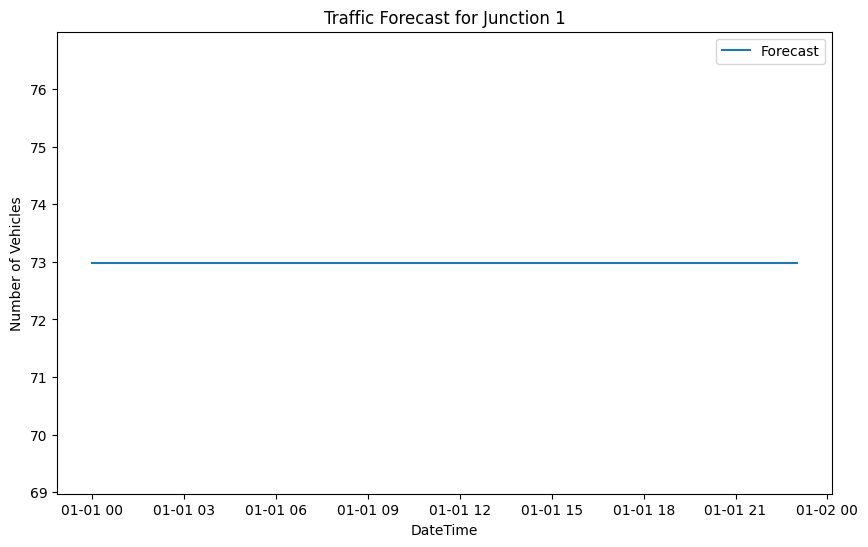

2023-01-01 00:00:00    72.985286
2023-01-01 01:00:00    72.985286
2023-01-01 02:00:00    72.985286
2023-01-01 03:00:00    72.985286
2023-01-01 04:00:00    72.985286
2023-01-01 05:00:00    72.985286
2023-01-01 06:00:00    72.985286
2023-01-01 07:00:00    72.985286
2023-01-01 08:00:00    72.985286
2023-01-01 09:00:00    72.985286
2023-01-01 10:00:00    72.985286
2023-01-01 11:00:00    72.985286
2023-01-01 12:00:00    72.985286
2023-01-01 13:00:00    72.985286
2023-01-01 14:00:00    72.985286
2023-01-01 15:00:00    72.985286
2023-01-01 16:00:00    72.985286
2023-01-01 17:00:00    72.985286
2023-01-01 18:00:00    72.985286
2023-01-01 19:00:00    72.985286
2023-01-01 20:00:00    72.985286
2023-01-01 21:00:00    72.985286
2023-01-01 22:00:00    72.985286
2023-01-01 23:00:00    72.985286
Freq: h, Name: predicted_mean, dtype: float64


In [21]:
# Example usage:
junction = 1
start_date = '2023-01-01'
periods = 24  # Predict for the next 24 hours

forecast = predict_traffic_for_input(junction, start_date, periods)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecast')
plt.title(f'Traffic Forecast for Junction {junction}')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

print(forecast)